# XGBoost Memory Refresh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trainDF = pd.read_csv("train.csv")
testDF = pd.read_csv("test.csv")
print(trainDF.head(3))
print(testDF.head(1))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
   PassengerId  Pclass              Name   Sex   Age  SibSp  Parch  Ticket  \
0          892       3  Kelly, Mr. James  male  34.5      0      0  330911   

     Fare Cabin Embarked  
0  7.8292   NaN        Q  


 #### Drop unnecessary columns that will not have any logical relation to whether a passenger survives or dies. 

In [3]:
trainDF = trainDF.drop(columns = ['PassengerId', 'Name', 'Embarked', 'Ticket', 'Cabin'])
testDF = testDF.drop(columns = ['PassengerId', 'Name', 'Embarked', 'Ticket', 'Cabin'])

print(trainDF['Sex'].unique())
#turn sex column to a binary variable
trainDF['Sex'] =  trainDF['Sex'].replace({'male': 0,'female': 1})
testDF['Sex'] =  testDF['Sex'].replace({'male': 0,'female': 1})

print(trainDF.head(1))
print()
print("Any nulls?\n")
print(trainDF.isnull().sum())
print(testDF.isnull().sum())

['male' 'female']
   Survived  Pclass  Sex   Age  SibSp  Parch  Fare
0         0       3    0  22.0      1      0  7.25

Any nulls?

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64
Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       1
dtype: int64


D:\Temp\ipykernel_28200\1314936504.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  trainDF['Sex'] =  trainDF['Sex'].replace({'male': 0,'female': 1})
D:\Temp\ipykernel_28200\1314936504.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  testDF['Sex'] =  testDF['Sex'].replace({'male': 0,'female': 1})


#### We can see some null values, let's fill them with their median values. 

In [4]:
trainDF['Age'] = trainDF['Age'].fillna(trainDF['Age'].median())
trainDF['Age'] = testDF['Age'].fillna(testDF['Age'].median())
testDF['Fare'] = testDF['Fare'].fillna(testDF['Fare'].median())

In [5]:
print(trainDF.isnull().sum())
print(testDF.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         473
SibSp         0
Parch         0
Fare          0
dtype: int64
Pclass     0
Sex        0
Age       86
SibSp      0
Parch      0
Fare       0
dtype: int64


### Simple Exploratory Data Analysis

In [6]:
trainDF.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,418.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.599282,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,12.703770,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,23.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.750000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,76.000000,8.000000,6.000000,512.329200


### Plot of Age vs Survival

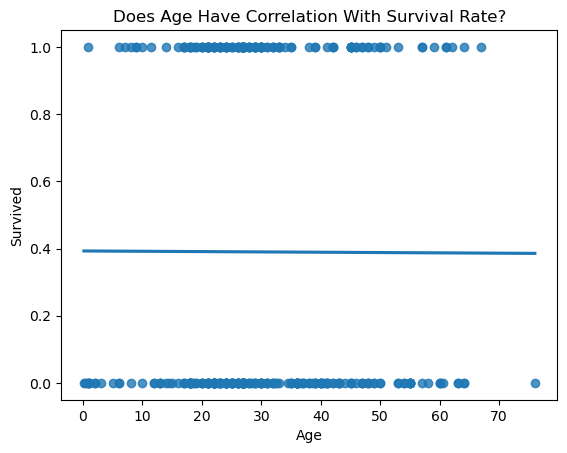

In [7]:
x = trainDF['Age']
y = trainDF['Survived']
sns.regplot(x = x, y= y, data = trainDF, logistic=False, ci=None)
plt.xlabel('Age')
plt.ylabel('Survived')
plt.title("Does Age Have Correlation With Survival Rate?")
plt.show()

#### Doesn't seem like there is any correlation
#### Let's create another simple plot for another variable

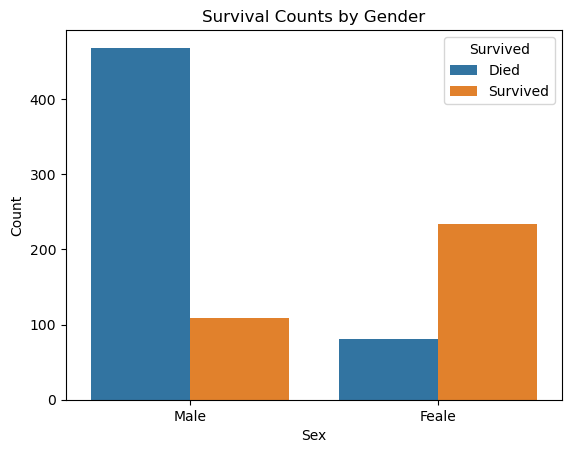

In [8]:
sns.countplot(
    x=trainDF['Sex'].map({0: 'Male', 1: 'Feale'}),  
    hue=trainDF['Survived'].map({0: 'Died', 1: 'Survived'}), 
    data=trainDF)
plt.ylabel("Count")
plt.title("Survival Counts by Gender")
plt.show()

#### It seems like males died more; which is in line with woman and children first code

### Fit XGBoost with Default Parameters

In [9]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score

#### Train-test-validation split

In [10]:
"""
features = [col for col in trainDF.columns if col not in ('Survived')] # lets fit everything
X = trainDF[features]
y = trainDF['Survived']

# create validation set too
xTrain, xVal, yTrain, yVal = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print(f"Train: {len(X_train)} samples")      
print(f"Validation: {len(X_val)} samples")  
print(f"Test: {len(X_test)} samples")
"""

'\nfeatures = [col for col in trainDF.columns if col not in (\'Survived\')] # lets fit everything\nX = trainDF[features]\ny = trainDF[\'Survived\']\n\n# create validation set too\nxTrain, xVal, yTrain, yVal = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)\n\nprint(f"Train: {len(X_train)} samples")      \nprint(f"Validation: {len(X_val)} samples")  \nprint(f"Test: {len(X_test)} samples")\n'

#### Since we already have the test dataset as seperate, we don't need to split our data for the test set.
#### And, since we are going to be using the cross_validation parameter in the XGBoost model, we don't need to split for validation set either.

In [11]:
features = [col for col in trainDF.columns if col not in ('Survived')] # lets fit everything
X = trainDF[features]
y = trainDF['Survived']

In [12]:
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [13]:
yPred = model.predict(testDF)
# Since we don't have the test set's target values in hand, we can't check for accuracy.
# We can see how the XGB model with default params classifies the first 10 samples though.
print(yPred[:10])

[0 1 1 0 1 0 1 0 1 1]


### Tune Hyperparameters

In [14]:
from sklearn.model_selection import RandomizedSearchCV # no gridsearch, we have too many parameters

In [15]:
paramsToTest = {
    "n_estimators": [10, 50, 100, 500],
    "max_depth": [3,5,7,10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "min_child_weight": [1,3,5,7],
    "subsample": [0.6,0.8,1.0],
    "colsample_bytree": [0.6,0.8,1.0],
    "gamma": [0,0.1,0.3,1]
}
model2 = XGBClassifier(tree_method="hist", eval_metric="logloss")

In [16]:
search = RandomizedSearchCV(
    model2,
    param_distributions = paramsToTest,
    n_iter = 50,
    scoring = "accuracy",
    cv = 5,      # validation is handled automatically with this cross validation parameter, so we don't need the validation spilt
    n_jobs = -1,
    verbose = 1
)

search.fit(X, y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3, 1],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [10, 50, 100, 500],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='accuracy', verbose=1)

In [17]:
best = search.best_estimator_

print(f"Best CV score: {search.best_score_:.4f}")
print(f"Best params: {search.best_params_}")

yPred2 = best.predict(testDF)
print(yPred2[:10])
print(len(yPred2)) # check if size matches with test set just in case

Best CV score: 0.8115
Best params: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.3, 'gamma': 1, 'colsample_bytree': 0.6}
[0 1 0 0 1 0 1 0 1 0]
418


### Feature Importance Analysis

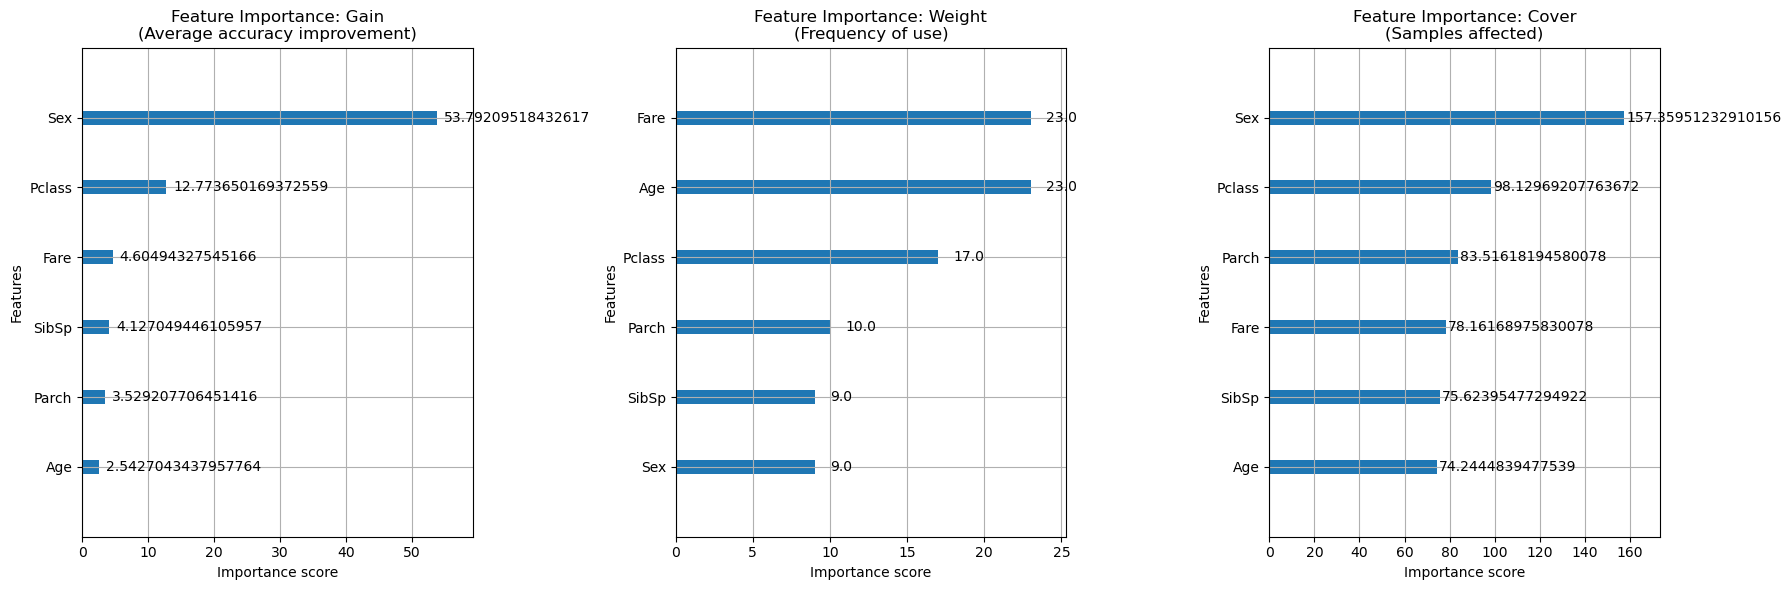

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gain: Average improvement in accuracy when feature is used => features ranked by how good their splits are
plot_importance(best, importance_type='gain', ax=axes[0], max_num_features=10)
axes[0].set_title('Feature Importance: Gain\n(Average accuracy improvement)')

# Weight: Number of times feature is used in splits
plot_importance(best, importance_type='weight', ax=axes[1], max_num_features=10)
axes[1].set_title('Feature Importance: Weight\n(Frequency of use)')

# Cover: Average number of samples affected by splits using this feature
plot_importance(best, importance_type='cover', ax=axes[2], max_num_features=10)
axes[2].set_title('Feature Importance: Cover\n(Samples affected)')

plt.tight_layout()
plt.savefig('feature_importance_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

#### Results make sense, as feature with high gains should have low weight, and high cover.

### Feature Correlation Analysis

#### Correlation with Target

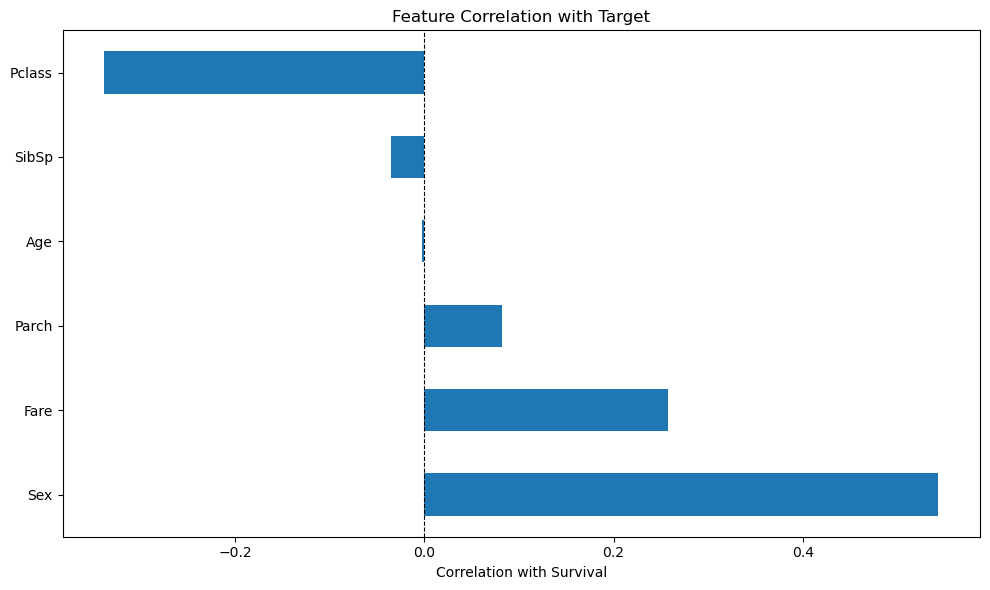

Top correlated features with Survival:
Sex       0.543351
Fare      0.257307
Parch     0.081629
Age      -0.002456
SibSp    -0.035322
Pclass   -0.338481
Name: Survived, dtype: float64


In [19]:
correlations = X.assign(Survived=y).corr()['Survived'].drop('Survived').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
correlations.plot(kind='barh')
plt.xlabel('Correlation with Survival')
plt.title('Feature Correlation with Target')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.savefig('target_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("Top correlated features with Survival:")
print(correlations.head(10))


#### Pclass, Sex, Fare seem to be affecting the survival of a passenger the most.

### Check for Multicollinearity

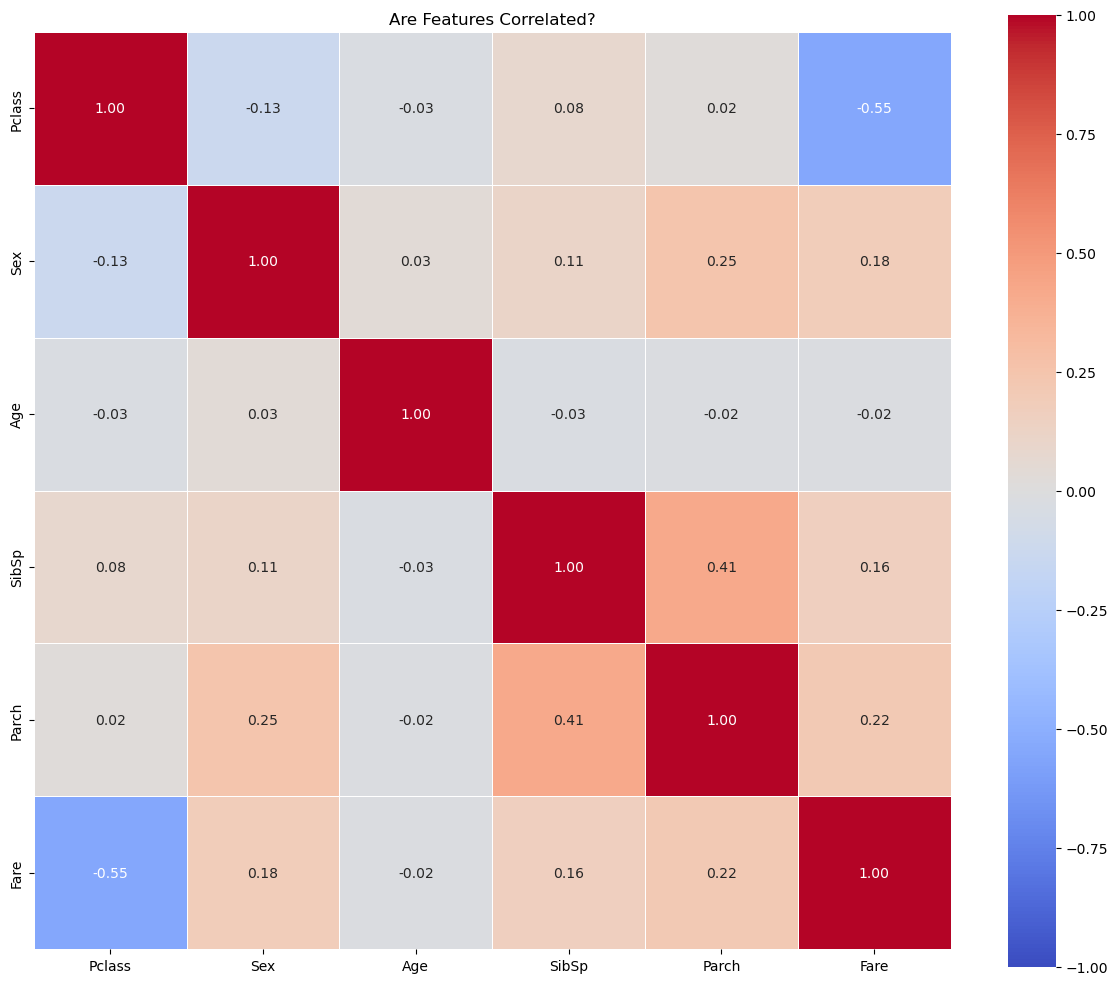

In [20]:
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()

sns.heatmap(correlation_matrix, 
            annot=True,  # Show values
            fmt='.2f',   # 2 decimal places
            cmap='coolwarm',
            center=0,
            vmin=-1, vmax=1,
            square=True,
            linewidths=0.5)
plt.title('Are Features Correlated?')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Find highly correlated pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Threshold
            high_corr_pairs.append({
                'feature1': correlation_matrix.columns[i],
                'feature2': correlation_matrix.columns[j],
                'correlation': correlation_matrix.iloc[i, j]
            })

#### Thankfully, most features don't seem to be really correlated. Most correlation is between the Pclass and Fare, which is negative for some reason. 
#### If we wanted, we could try excluding the correlated features one-by-one to see if model performance would increase

### Create Kaggle submission

In [21]:
testDFNew = pd.read_csv("test.csv")
submission = pd.DataFrame({
    'PassengerId': testDFNew['PassengerId'],
    'Survived': yPred2
})

submission.to_csv('submission.csv', index=False)

In [23]:
from sklearn.model_selection import cross_val_score

In [26]:
xTrain = trainDF[features]
yTrain = trainDF['Survived']

train_score = best.score(xTrain, yTrain)
cv_scores = cross_val_score(best, xTrain, yTrain, cv=5)
print(f"Train score: {train_score:.4f}")
print(f"CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

Train score: 0.8272
CV score: 0.8115 (+/- 0.0172)


In [28]:
scores = []
for seed in range(10):
    model = XGBClassifier(random_state=seed, eval_metric='error')
    cv = cross_val_score(model, xTrain, yTrain, cv=5)
    scores.append(cv.mean())

print(f"Mean: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

Mean: 0.7745 ± 0.0000
